# 라이브러리

In [1]:
import numpy as np
import torch
from torch.nn import Conv2d
from PIL import Image
import matplotlib.pyplot as plt
import requests
from scipy.ndimage import zoom as resize

# 이미지 불러오기

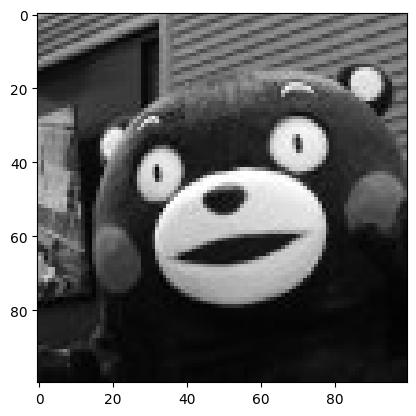

In [2]:
url_Image = "http://raw.githubusercontent.com/jmlipman/jmlipman.github.io/master/images/kumamon.jpeg"
im = Image.open(requests.get(url_Image, stream=True).raw).convert("L")
plt.imshow(im, cmap="gray")
plt.show()
im = np.array(im)

# Convolution Parameter

In [3]:
kernel_size = 7
dilation = 1
stride = 1
padding = 3
#Define a 2D convolutions
conv_1 = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel_size, dilation=dilation, padding=padding)

kernel_size = 7
dilation = 2
stride = 1
padding = 6
conv_2 = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel_size, dilation=dilation, padding=padding)

#Use the same weights and bias
conv_2.weight.data = conv_1.weight.data
conv_2.bias.data = conv_1.bias.data

# 첫번째 구조
다운샘플링 -> 컨볼루션 층 통과 -> 업샘플링

In [5]:
# 1) Downsampling 100x100 -> 50x50
im1 = resize(im, (0.5,0.5)).reshape(1,1,50,50)

# 2) Apply the Convolution to that Image
input_image = torch.Tensor(im1)
output_image = conv_1(input_image).detach().numpy()[0,0]

# 3) Upsample
upsampled = resize(output_image, (2,2))

# 두번째 구조

In [6]:
im2 = im.reshape(1, 1, 100, 100)

imput_image = torch.Tensor(im2)
output_image = conv_2(input_image).detach().numpy()[0,0]

# 결과 출력

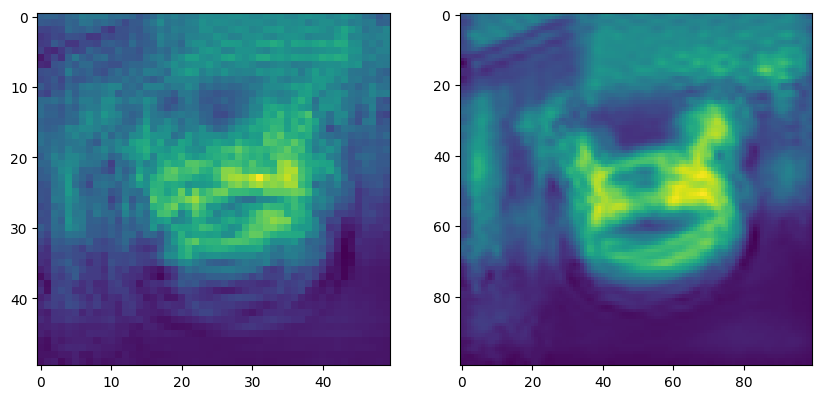

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(output_image)
plt.subplot(122)
plt.imshow(upsampled)
plt.show()